Graph Generated!


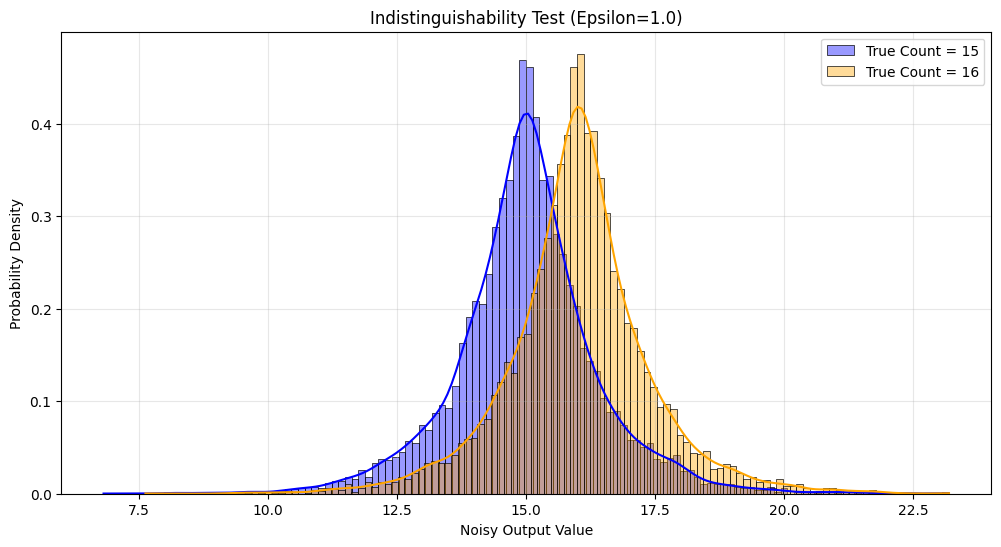

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Makes graphs look nicer

# ==========================================
# PART 1: The DP Mechanism (Hardcoded for Colab)
# ==========================================
class DPMechanism:
    def __init__(self, threshold=15, epsilon=1.0, sensitivity=1):
        self.threshold = threshold
        self.epsilon = epsilon
        self.sensitivity = sensitivity

    def check_threshold(self, true_count):
        return true_count >= self.threshold

    def release_count(self, true_count):
        if not self.check_threshold(true_count):
            return None
        scale = self.sensitivity / self.epsilon
        return true_count + np.random.laplace(loc=0, scale=scale)

# ==========================================
# PART 2: The Privacy Test (Histogram Overlap)
# ==========================================
def run_privacy_test():
    dp = DPMechanism(epsilon=1.0)
    trials = 10000

    # Scenario A: The count is 15 (Alice didn't vote)
    results_15 = [dp.release_count(15) for _ in range(trials)]

    # Scenario B: The count is 16 (Alice voted)
    results_16 = [dp.release_count(16) for _ in range(trials)]

    # Filter out Nones (just in case)
    results_15 = [x for x in results_15 if x is not None]
    results_16 = [x for x in results_16 if x is not None]

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot Histogram A (Count = 15)
    sns.histplot(results_15, color="blue", label="True Count = 15", kde=True, stat="density", alpha=0.4)

    # Plot Histogram B (Count = 16)
    sns.histplot(results_16, color="orange", label="True Count = 16", kde=True, stat="density", alpha=0.4)

    # Style
    plt.title(f"Indistinguishability Test (Epsilon={dp.epsilon})")
    plt.xlabel("Noisy Output Value")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True, alpha=0.3)

    print("Graph Generated!")
    plt.show()

if __name__ == "__main__":
    run_privacy_test()